In [1]:
import pickle
import pandas as pd
import logging
from IPython.display import display
logging_format = '%(asctime)s %(levelname)s: %(message)s'
logging.basicConfig(format=logging_format, datefmt='%Y-%m-%d %H:%M:%S',
                    level=logging.INFO)
import shap
shap.initjs()


/home/miguel/.pyenv/versions/3.8.12/envs/train_env_AUS/lib/python3.8/site-packages/shap/utils/_clustering.py:35: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def _pt_shuffle_rec(i, indexes, index_mask, partition_tree, M, pos):
/home/miguel/.pyenv/versions/3.8.12/envs/train_env_AUS/lib/python3.8/site-packages/shap/utils/_clustering.py:54: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-us

In [2]:
# from training_functions_1 import *
# path='../outputs/'
# X_test = get_data(name_sav='X_test.sav', path=path)

In [6]:
path = '../outputs/'

file = f'{path}explainer.sav'
explainer = pickle.load(open(file, 'rb'))

file = f'{path}shap_test.sav'
shap_test = pickle.load(open(file, 'rb'))

file = f'{path}x_Test.sav'
x_Test = pickle.load(open(file, 'rb'))

file = f'{path}X_test.sav'
X_test = pickle.load(open(file, 'rb'))

In [7]:
len_features = shap_test.values[0].shape[0]
len_X_test = X_test.shape[0]
sp_values_list = []
for j in range(0, len_X_test):
    ind_sp_values_list = []
    for i in range(0, len_features):
        ind_sp_values_list.append(shap_test.values[j][i][1])
    sp_values_list.append(ind_sp_values_list)
    pd_shape = pd.DataFrame(
        sp_values_list, columns=list(X_test.columns))
    pd_f_i = abs(pd_shape).mean().to_frame()
    pd_f_i.reset_index(drop=False, inplace=True)
    pd_f_i.columns = ['feature_names', 'feature_importances']
    pd_f_i.sort_values(by='feature_importances',
                   ascending=False,
                   inplace=True)

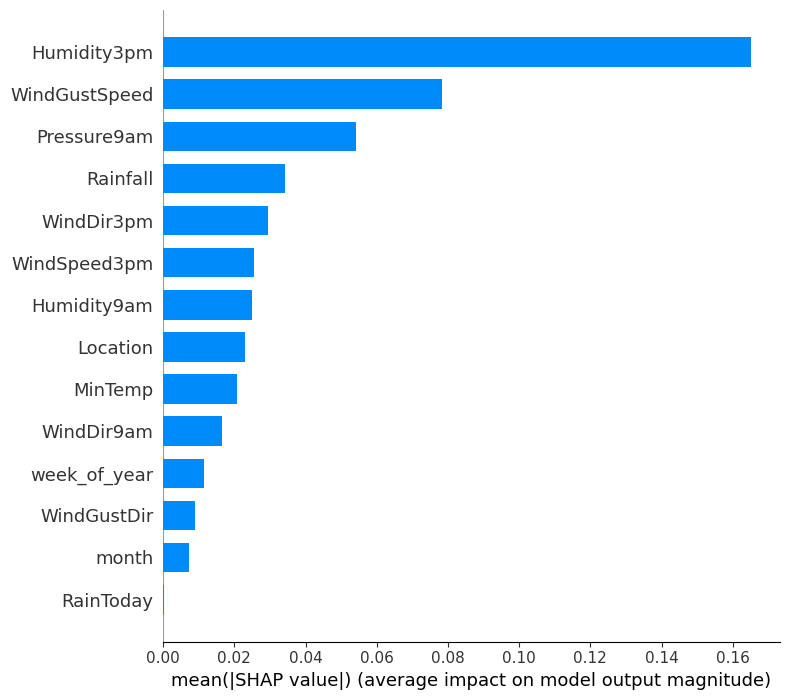

In [8]:
shap.summary_plot(pd_shape.values,
                  features=X_test,
                  feature_names=X_test.columns,
                  plot_type="bar")

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


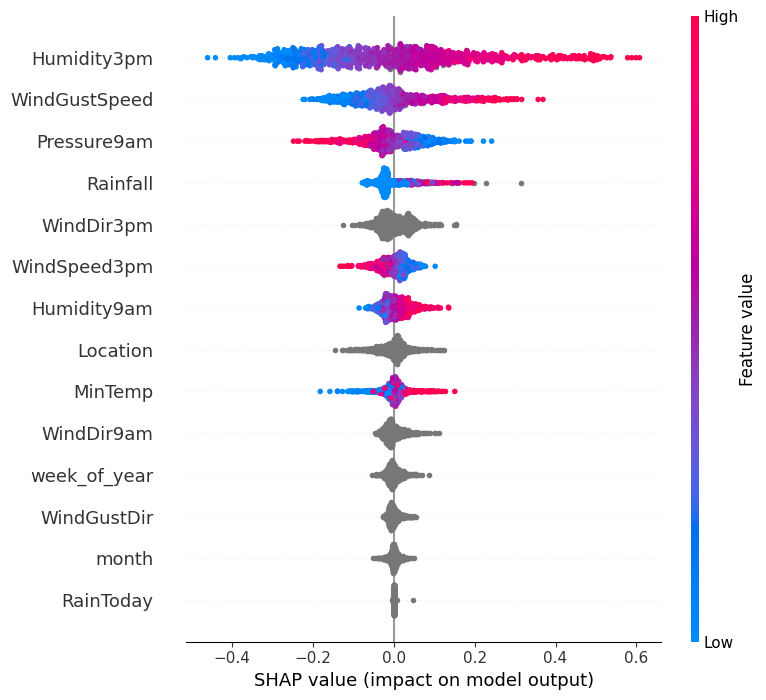

In [9]:
shap.summary_plot(pd_shape.values,
                  features=X_test,
                  feature_names=X_test.columns)

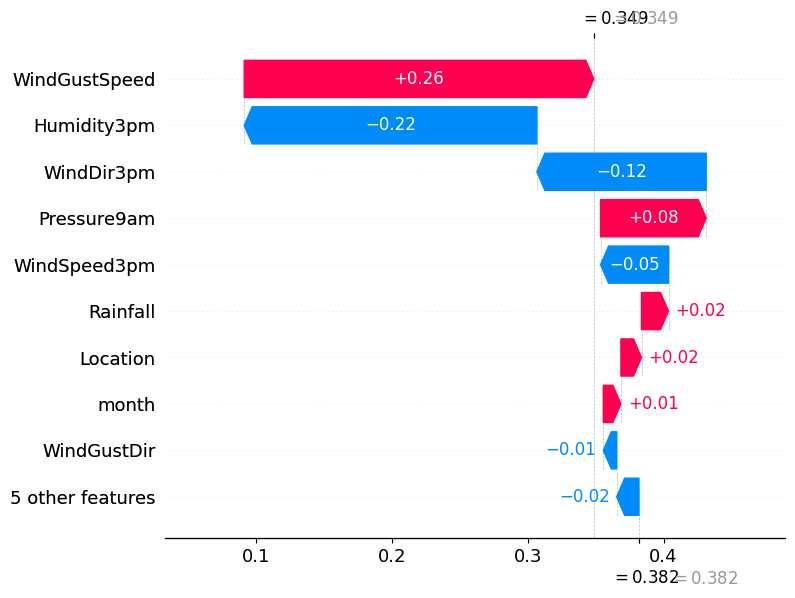

In [10]:
i=5
shap.plots._waterfall.waterfall_legacy(shap_test.base_values[i][1],
                                       pd_shape.values[i],
                                       feature_names=X_test.columns)

In [11]:
pd_shape.values[i]

array([ 1.51513322e-02, -9.82187733e-03, -7.12314854e-03, -1.24548273e-01,
       -1.30244645e-04,  1.29507523e-02,  1.01813371e-03, -5.39257422e-03,
        1.98660919e-02,  2.57115670e-01, -4.99815965e-02, -4.77234127e-03,
       -2.15251348e-01,  7.77047108e-02])

In [12]:
clf = pickle.load(open('../outputs/rain_model.sav', 'rb'))

In [13]:
X_test.head(10)

,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,month,week_of_year,MinTemp,Rainfall,WindGustSpeed,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am
67825,Melbourne,NNW,NNE,S,No,7,27,9.7,0.8,20.0,4.0,90.0,65.0,1021.2
32704,Sydney,SE,S,ESE,Yes,2,7,21.8,8.0,41.0,20.0,79.0,58.0,1007.1
105700,Woomera,NNE,NNE,N,No,9,38,7.4,0.0,50.0,31.0,50.0,22.0,1014.0
65605,MelbourneAirport,N,NE,N,No,2,6,14.3,0.0,63.0,44.0,68.0,32.0,1018.7
70914,Mildura,NE,NE,NNE,No,9,39,5.5,0.0,61.0,33.0,49.0,35.0,1010.7
70720,Mildura,WSW,WSW,SW,No,3,11,15.6,0.4,69.0,31.0,66.0,31.0,1007.3
129359,Hobart,SE,NE,S,No,2,6,13.8,0.0,43.0,24.0,64.0,51.0,1016.3
14430,Moree,SSW,S,SSW,No,8,34,1.4,0.0,37.0,24.0,71.0,44.0,1023.9
93623,Townsville,N,N,N,No,11,44,23.8,0.0,33.0,24.0,62.0,53.0,1012.0
108652,Albany,Unidentified,NW,Unidentified,Yes,7,28,12.6,5.4,NaN,NaN,78.0,NaN,1006.2


In [14]:
clf.predict_proba(pd.DataFrame(X_test.loc[70720, :]).T)[0][1]

0.3486640670871507